In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# Sentiment Prediction on Movie Reviews

In this Machine Learning Project, we will be working on sentiment prediction using movie reviews data. We have three CSV files: `train.csv`, `movies.csv`, and `test.csv`, containing the training dataset, movie information, and testing dataset respectively.

# **1. Data Loading**

In [2]:
train = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
movie = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
test = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')

### 1.1 Check data samples
Let's look at a few data samples with `head()` method.

In [3]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


`train.csv` - the training set containing the review sentiment along with other features.

* **movieid:** This column represents the unique identifier for each movie. It is used to link the movie information with the corresponding data.

* **reviewerName:** This column contains the name or identifier of the person who wrote the review.

* **isFrequentReviewer:** This column indicates whether the reviewer is a frequent reviewer or not. It could be a True or False, where True indicate that the reviewer is a frequent contributor, and False indicate is not a frequent contributor.

* **reviewText:** This column contains the actual text of the movie review written by the reviewer. 

* **sentiment:** This column represents the sentiment associated with the review. It is the target variable that we want to predict in our sentiment analysis task. Where sentiment are classified into two categoriesposit POSITIVE and NEGATIVE.

In [4]:
movie.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


`movies.csv` - the file with metadata on movies.

* **movieid:** This column represents the unique identifier for each movie. It is used to link movie information with other data. This same column that we found in `train` dataset.

* **title:** This column contains the title of the movie.

* **audienceScore:** This column represents the audience score for the movie. It is a numerical value.

* **rating:** This column contains the rating assigned to the movie.

* **ratingContents:** This column might contain additional information about the content that led to the given rating. 

* **releaseDateTheaters:** This column indicates the date when the movie was released in theaters.

* **releaseDateStreaming:** This column indicates the date when the movie was released for streaming or online viewing.

* **runtimeMinutes:** This column specifies the duration of the movie in minutes.

* **genre:** This column contains the genre or genres to which the movie belongs. Genres describe the type of content the movie falls into, such as Action, Drama, Comedy, etc.

* **originalLanguage:** This column represents the original language of the movie.

* **director:** This column contains the name of the director who directed the movie.

* **boxOffice:** This column contain information about the movie's box office earnings or revenue.

* **distributor:** This column specifies the distributor or production company responsible for distributing the movie.

* **soundType:** This column describe the type of sound used in the movie.


In [5]:
test.head()

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


`test.csv` - the test set, has review features, but no sentiment column, since it is the target.

This dataset maintains the same column structure as the `train` dataset, except for the absence of the sentiment column, which is excluded in the test set. Also the column ` isFrequentReviewer` is renamed as `isTopCritic`.

### 1.2 Data statistics
Let's use `info()` method to get quick description of data.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


* Total entries: 162758 
* There are total 5 columns: 4 features + 1 label
  * Label column: `sentiment`
  * Features: `[movieid,reviewerName, isFrequentReviewer, reviewText]`
* 4 columns are object and 1 column is bool

In [7]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23005 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


* Total entries: 126404 
* There are total 14 columns: 14 features
  * Features: `[movieid, title, audienceScore, rating, ratingContents, releaseDateTheaters, releaseDateStreaming, runtimeMinutes, genre, originalLanguage, director, boxOffice, distributor, soundType]`
* 12 columns are object and 2 columns are float64

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55315 entries, 0 to 55314
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movieid       55315 non-null  object
 1   reviewerName  55315 non-null  object
 2   isTopCritic   55315 non-null  bool  
 3   reviewText    52805 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.3+ MB


* Total entries: 55315
* There are total 4 columns: 4 features
  * Features: `[movieid, reviewerName, isTopCritic, reviewText]`
* 4 columns are object and 1 column is bool

> From above we can conclude that is futher process we can join the   `train`   and   `movie`   dataset on  `movieid`. Also, in the test dataset, we need to rename the column labeled `isTopCritic` to `isFrequentReviewer` to maintain the consistency.

> Moving forward, our next objective is to find the relevent features, address any null or duplicate values, and do dataset cleaning as part of the upcoming steps.

# **2. Data Cleaning**

Firstly, we must check for any duplicate `movieid` values in the dataset. If duplicates exist, we should remove them beforehand to maintain data quality and avoid unnecessary rows when combining datasets, which can affect the model's accuracy. Also, exclude any duplicated and null rows from train data.

In [9]:
movie['movieid'].duplicated().sum() # these are the duplicated movieid in the dataset

16854

In [10]:
movie.isnull().sum()

movieid                      0
title                        0
audienceScore            70010
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120253
soundType               127341
dtype: int64

In [11]:
(movie.isnull().sum() / len(movie)) * 100

movieid                  0.000000
title                    0.000000
audienceScore           48.869871
rating                  90.233704
ratingContents          90.233704
releaseDateTheaters     78.519175
releaseDateStreaming    44.561560
runtimeMinutes           9.651817
genre                    7.736392
originalLanguage         9.673456
director                 0.000000
boxOffice               89.708777
distributor             83.941560
soundType               88.889277
dtype: float64

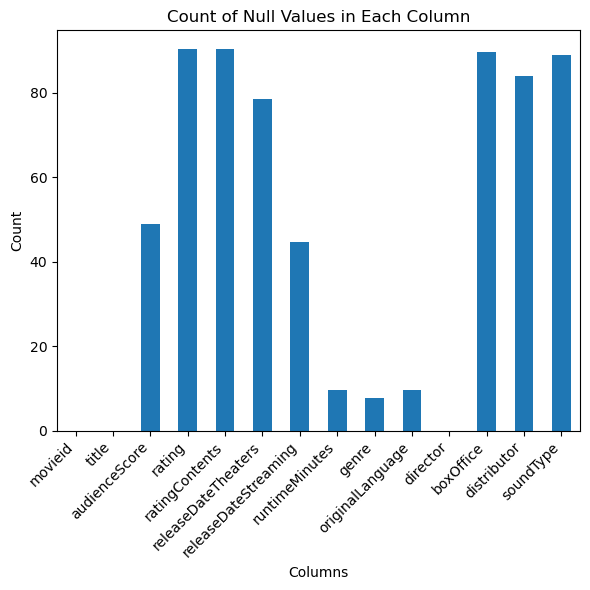

In [12]:
import matplotlib.pyplot as plt
null_counts = (movie.isnull().sum() / len(movie)) * 100
plt.figure(figsize=(6, 6))
null_counts.plot(kind='bar')
plt.title('Count of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
train.isnull().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [14]:
train.duplicated().sum()

1118

In [15]:
test.isnull().sum()

movieid            0
reviewerName       0
isTopCritic        0
reviewText      2510
dtype: int64

In [16]:
#Keeping only first instance of a movieid
movie = movie.drop_duplicates(subset="movieid", keep="first") 


# removing all the columns that have more than 10% null values in the dataset. Also, I am excluding the title column becaues it is just like movieid.
movie = movie.drop(columns=["title","rating","ratingContents","releaseDateTheaters",
                            "boxOffice" ,"distributor","soundType", "releaseDateStreaming", "audienceScore"]) 

In [17]:
movie

,movieid,runtimeMinutes,genre,originalLanguage,director
0,han_solo_heroic_myth_wonder_woman,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet
1,voyage_tyler_durden_han_solo_stardust,114.0,Drama,English,Nathan Haack
2,norman_bates_ferris_bueller_hermione_granger_v...,120.0,Drama,Korean,Theresa Smith
3,elegant_hermione_granger,90.0,"Action, Mystery & thriller",English,Donald Lewis
4,adventure_rocky_balboa,80.0,"Fantasy, Adventure, Animation",English,Howard Simms
...,...,...,...,...,...
143252,james_bond_jason_bourne,131.0,"Action, Mystery & thriller",Hindi,Reginald Davis
143253,sherlock_holmes_surreal_james_bond,90.0,"Action, Adventure, Anime",Japanese,William Sims
143254,mr._miyagi_katniss_everdeen_harmony,99.0,Drama,English,Robert Paddock
143255,elegant_emerald_valiant_donnie_darko,43.0,Documentary,English,Roy Lovelace


In [18]:
train = train.dropna() # removing null values row from train
train.drop_duplicates() # removing duplicated values row from train

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE
...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE


In [19]:
test.rename(columns={"isTopCritic":"isFrequentReviewer"},inplace=True) #renaming the column

In [20]:
train['sentiment'].value_counts()

POSITIVE    104719
NEGATIVE     51592
Name: sentiment, dtype: int64

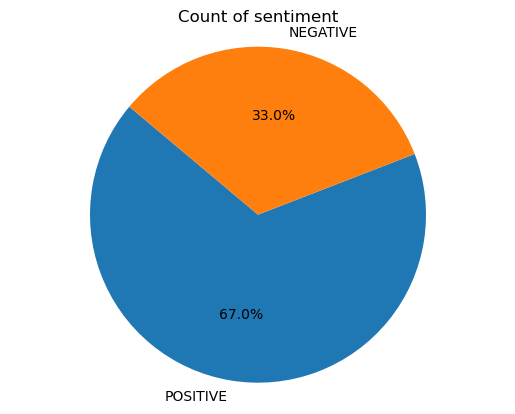

In [21]:
labels = ['POSITIVE', 'NEGATIVE']

plt.pie(train['sentiment'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title("Count of sentiment")
plt.show()

> After cleaning, our datasets are now refined, with the exception of the test dataset. Despite the presence of 2510 null values in the reviewText column of the test dataset, these instances cannot be removed since the contest requires a submission of 55,315 rows.

> Proceeding to the next step, we will execute dataset joining and segmentation. This will involve  feature extraction, addressing missing values through imputation, removing stopwords or any special charater, standardizing numerical features and encoding categorical features to facilitate analysis and modeling.

# **3. Preprocessing**

### 3.1 Data joining
Let's join the `movie` dataset with `train` and `test` data over `movieid`.

In [22]:
# we are keeping all rows from the left dataset.
X = train.merge(movie, on='movieid', how='left') 
Test = test.merge(movie, on='movieid', how='left')

In [23]:
#seperating labels from the joined data and removing them from the features DataFrame.
y = X['sentiment']
X = X.drop(columns=['sentiment'])

### 3.2 Data imputation
Filling the missing values that we had encountered in the `movie` dataset.

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

preprocessor1 = ColumnTransformer(
    transformers=[
        ("num_imputer", SimpleImputer(strategy="mean"), ["runtimeMinutes"]),
        ("cat_imputer", SimpleImputer(strategy="most_frequent"), ["genre", "originalLanguage"])
    ],
    remainder="passthrough"
)

# This ColumnTransformer performs targeted imputation for both numerical and categorical columns.
# For numerical columns, missing values are filled with the mean value,
# while for categorical columns, the most_frequent value is utilized for imputation.

In [25]:
X = pd.DataFrame(preprocessor1.fit_transform(X))

X.rename(
    columns={0: "runtimeMinutes", 1: "genre",2:"originalLanguage",3:"movieid",
            4: "reviewerName", 5:"isFrequentReviewer", 6:"reviewText", 7:"director"},
    inplace=True,
)

In [26]:
Test = pd.DataFrame(preprocessor1.transform(Test))

Test.rename(
    columns={0: "runtimeMinutes", 1: "genre",2:"originalLanguage",3:"movieid",
            4: "reviewerName", 5:"isFrequentReviewer", 6:"reviewText", 7:"director"},
    inplace=True,
)

Test["reviewText"] = SimpleImputer(strategy="most_frequent").fit_transform(Test[["reviewText"]]) # imputing the null values of reviewText in Test dataset


# In the prvious two snippets, the ColumnTransformer was initially fit on the`X`, and subsequently applied to transform both `on X` and the `Test` data.
# Additionally, to enhance clarity and ease of identification in the upcoming feature encoding step, we have renamed the columns.

In [27]:
stopwords = ['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll",
             "you'd",'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",
             'her','hers','herself','it', "it's",'its','itself','they','them','their','theirs','themselves',
             'what','which','who','whom','this','that',"that'll",'these','those','am','is','are','was',
             'were','be','been','being','have','has','had','having','do','does','did','doing','a','an',
             'the','and','but','if','or','because','as','until','while','of','at','by','for','with','about',
             'against','between', 'into','through','during','before','after','above','below','to','from',
             'up','down','in','out','on','off','over','under','again','further','then','once','here','there',
             'when','where','why','how','all','any','both','each','few','more','most','other','some','such',
             'no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just',
             'don',"don't",'should',"should've",'now','d','ll','m','o','re','ve','y','ain','aren',"aren't",
             'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',
             "haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'shan',
             "shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',
             "wouldn't", "us"]

#this is a custom function for removing stop words from a specific column because these words will not help in learning.
def remove_stopwords(text):
    new_text=[]
    text = str(text)
    for word in text.split():
        if word in stopwords:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)


#Utilizing this function, we seamlessly combine 'originalLanguage,' 'reviewerName,' and 'director' 
#by appending '_' between the spaces. This step is essential to prevent the unintended creation of separate 
#columns for each individual word when applying TfidfVectorizer, ensuring a more coherent text representation. 
#This idea I got by watching the `movieid` column.

def joinName(Text):
    Name = ''
    Text = Text.split()
    for i in Text:
        Name += i+"_"
    return Name

In [28]:
import re 

#removing stopwords 
X["reviewText"] = X['reviewText'].apply(remove_stopwords)

#removing special characters
X["reviewText"] = X['reviewText'].str.replace(r'[^\w\s]+', '', regex = True)
X["originalLanguage"] = X["originalLanguage"].str.replace(r'[^\w\s]+', '', regex = True)

#joining the names
X["director"] = X['director'].apply(joinName)
X["reviewerName"] = X['reviewerName'].apply(joinName)
X["originalLanguage"] = X['originalLanguage'].apply(joinName)

In [29]:
#Similarly applying the same approach to the Test Dataset

Test["reviewText"] = Test['reviewText'].apply(remove_stopwords)

Test["reviewText"] = Test['reviewText'].str.replace(r'[^\w\s]+', '', regex = True)
Test["originalLanguage"] = Test["originalLanguage"].str.replace(r'[^\w\s]+', '', regex = True)

Test["director"] = Test['director'].apply(joinName)
Test["reviewerName"] = Test['reviewerName'].apply(joinName)
Test["originalLanguage"] = Test['originalLanguage'].apply(joinName)

In [30]:
X.head()

,runtimeMinutes,genre,originalLanguage,movieid,reviewerName,isFrequentReviewer,reviewText,director
0,105.0,"Comedy, Animation, Adventure, Fantasy",English_,marvelous_pirate,Benjamin_Henry_,False,Henry Selicks first movie since 2009s Coraline...,Bennie_Basso_
1,91.0,Action,English_,tony_montana_frodo_baggins_v_rocky_balboa,Felicia_Lopez_,False,With cast reads like Vogue Oscar party gues...,Alma_White_
2,130.0,Drama,English_,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr._Charles_Burgess_,True,Creed II give anything another slightly su...,Bobby_Oleary_
3,15.0,Drama,Spanish_,lara_croft_glimmer,Ryan_Barrett_,False,I know thinking Limitless Bradley Cooper...,Eric_Hutcherson_
4,131.0,"Crime, Drama",Portuguese_Brazil_,jason_bourne_surreal_the_terminator_indiana_jones,Alexander_Glover_,False,Director Fernando Meirelles tells story urge...,John_Trent_


### 3.3 Train Test Split
Now, next step involves splitting the dataset into two distinct portions: one for training the model and the other for testing its performance

In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() #Firstly encoding the label column
y = encoder.fit_transform(y)

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### 3.4 Feature Extraction, Encoding and Scaling
Most of the columns are text in this dataset so we have to features from them as numbers. Also, there is a column in which we will apply MinMaxScaler.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder

In [34]:
#This ColumnTransformer is Scaling 'audienceScore' and 'runtimeMinutes' columns using MinMaxScaler.
#Converting 'reviewText' and categorical columns like 'movieid,' 'reviewerName,' 'director,' 'genre,' 'originalLanguage' into numerical representations using TfidfVectorizer.
#Encodes 'isFrequentReviewer' column using OneHotEncoder.
    
preprocessor2 = ColumnTransformer(
    transformers=[
        ('numeric2', MinMaxScaler(), ['runtimeMinutes']),
        ('tfidf_text',TfidfVectorizer(), 'reviewText'),
        ('tfidf_movieid',TfidfVectorizer(), 'movieid'),
        ('tfidf_reviewername',TfidfVectorizer(), 'reviewerName'),
        ('tfidf_director',TfidfVectorizer(), 'director'),
        ('tfidf_genre', TfidfVectorizer(), 'genre'),
        ('tfidf_originalLanguage',TfidfVectorizer(), 'originalLanguage'),
        ('onehot_isFrequentReviewer', OneHotEncoder(), ['isFrequentReviewer']),
    ],
    remainder='passthrough'  # Pass through any columns not transformed
)

In [35]:
#Fitting the `preprocessor2` on the `train` dataset and subsequently transforming the `train`, `test`, and `Test` datasets ensures uniformity in feature representation across all datasets.
X_train = preprocessor2.fit_transform(X_train)

X_test = preprocessor2.transform(X_test)
Test = preprocessor2.transform(Test)

In [36]:
X_train.shape

(125048, 117771)

### 3.5 Feature Selection
This data have a lot of features - 117,771. Which is a bit much, so I picked a more manageable 65,000 features with the help of SelectKBest with chi-squared (chi²) statistic. I figured out this number ('k') by trying different options and seeing which worked best when training the model.

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k =65000)

In [38]:
X_train = chi2_features.fit_transform(X_train, y_train)

X_test = chi2_features.transform(X_test)
Test = chi2_features.transform(Test)

# **4. Select and Train Models**

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

### 4.1 Dummy Classifier
A dummy classifier is like a basic guessing model. It helps to find out weather the more sophisticated  models are actually smart or just guessing. If other model can't do better than the guesser, something might be wrong with it or the data.

In [40]:
# from sklearn.dummy import DummyClassifier

# dummy = DummyClassifier(strategy = "most_frequent")
# dummy.fit(X_train, y_train)
# y_pred_dummy = dummy.predict(X_test)
# print(accuracy_score(y_test,y_pred_dummy))
# print(confusion_matrix(y_test,y_pred_dummy))
# print(precision_score(y_test,y_pred_dummy))

**accuracy_score:**  0.6753990340018552

**confusion_matrix:**

[[0    10148]

 [0     21115]]
 
**precision_score:** 0.6753990340018552

### 4.2 Naive Bayes Classifier (BernoulliNB)
BernoulliNB is a straightforward classifier that relies on conditional probabilities. I have used BernolliNB because it works well on text data and binary (0,1) data.

`This was a good model with around 80% acurracy on the Test Data but not the best one.`

In [41]:
# from sklearn.naive_bayes import BernoulliNB

# bnb = BernoulliNB()
# bnb.fit(X_train, y_train)
# y_pred_bnb = bnb.predict(X_test)
# print(accuracy_score(y_test,y_pred_bnb))
# print(confusion_matrix(y_test,y_pred_bnb))
# print(precision_score(y_test,y_pred_bnb))

**accuracy_score:** 0.8160125387838659

**confusion_matrix:**

[[7105  3043]

[2709 18406]]
 
**precision_score:** 0.858128584083174

### 4.3 DecisionTree Classifier
A decision tree classifier is a type of machine learning model that makes decisions by following a tree-like structure. It asks questions about input features step by step, leading to a final prediction or classification at the end. It's like a flowchart for making decisions in data-driven tasks.

In [42]:
# from sklearn.tree import DecisionTreeClassifier

# dtc = DecisionTreeClassifier(max_depth=500,min_samples_split=50,min_samples_leaf=2,
#                         random_state=42)
# dtc.fit(X_train, y_train)
# y_pred_dtc = dtc.predict(X_test)
# print(accuracy_score(y_test,y_pred_dtc))
# print(confusion_matrix(y_test,y_pred_dtc))
# print(precision_score(y_test,y_pred_dtc))

In [43]:
# y_pred = dtc.predict(X_train)
# print(accuracy_score(y_train,y_pred))
# print(confusion_matrix(y_train,y_pred))
# print(precision_score(y_train,y_pred))

**accuracy_score:** 0.6902408598023222

**confusion_matrix:**

[[ 5353  4795]

 [ 4889 16226]]
 
**precision_score:** 0.7718947718947718


> This is the accuracy score of X_train. We can see that the model is working well on this and we can conclude that this classifier is overfitting.


**accuracy_score:** 0.8743362548781268

**confusion_matrix:**
[[34911  6533]

 [ 9181 74423]]
 
**precision_score:** 0.9193018429764317

### 4.4 Hyperparameter Tunning
**LogisticRegression Classifier**

Logistic regression is a statistical technique used for binary classification. Despite its name, it's used for classification, not regression. It calculates the probability of an input belonging to one of two classes and then makes a decision based on a threshold. It's like drawing a straight line that separates two classes in a way that best fits the data. It's often used when you have two choices, like yes/no or pass/fail or positive/negative.

In [44]:
# this code will performs logistic regression with cross-validation using the LogisticRegressionCV class 
# and it will determines the best regularization parameter C.

from sklearn.linear_model import LogisticRegressionCV

lrcv = LogisticRegressionCV(Cs=10, cv=5, random_state=42)

lrcv.fit(X_train, y_train)

print("Best C parameter:", lrcv.C_)
accuracy = lrcv.score(X_test, y_test)
print("Test Accuracy:", accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best C parameter: [2.7825594]
Test Accuracy: 0.8312062182132233


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Best C parameter:** [2.7825594]

**Test Accuracy:** 0.8312062182132233

In [45]:
#In this code,we are doing hyperparameter tuning for the LogisticRegression classifier with cross validiation. 
# Given this extensive dataset, I've chosen to utilize the 'saga' solver, which is well-suited for handling larger datasets. 
#Additionally, I'm applying the 'l2' penalty and using the previously determined optimal value of C.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = {
    'max_iter': [12,100,200], # Maximum number of iterations
    'tol': [0.1, 0.01, 0.001] # Tolerance for stopping criteria
}

lrc_grid = LogisticRegression(solver = 'saga', penalty = 'l2', C= 2.7825594)
grid_search = GridSearchCV(lrc_grid, grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'max_iter': 200, 'tol': 0.001}
Test Accuracy: 0.8324217125675719


In [46]:
# I am now training the model using the identified best hyperparameters.

from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(solver='saga', penalty='l2', C= 2.7825594, max_iter= 12, tol= 0.001)
lrc.fit(X_train, y_train)
y_pred_lrc = lrc.predict(X_test)
print(accuracy_score(y_test,y_pred_lrc))
print(confusion_matrix(y_test,y_pred_lrc))
print(precision_score(y_test,y_pred_lrc))

0.8328055528899978
[[ 7006  3142]
 [ 2085 19030]]
0.8582897348006495


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


> **Note:** In this case the best parameters was not giving the best accuracy score. That's why I have used the parameters by which I got the best accuracy value on `train` dataset.

By training this logistic regression model I am getting the best score on it from all the models that I have trained as far. The NaiveBayes classifier was giving a good score but Decision Tree was overfitting.

In conclusion, the logistic regression model emerged as the most suitable choice for this predictive task based on its consistent high accuracy and its ability to generalize to new data.

### 4.5 Prediction
Now, we'll use the trained model to predict sentiments for the Test data.

In [47]:
y_pred = lrc.predict(Test)
submission = pd.DataFrame(columns = ['id', 'sentiment'])
submission['id'] = [i for i in range(len(y_pred))]
submission['sentiment'] = y_pred

In [48]:
# Converting the labels from 0,1 to POSITIVE and NEGATIVE

def convert(i):
    if  i == 1:
        i = 'POSITIVE'
    else:
        i = 'NEGATIVE'
    return i

submission["sentiment"] = submission['sentiment'].apply(convert)

In [49]:
submission.shape

(55315, 2)

In [50]:
submission

,id,sentiment
0,0,POSITIVE
1,1,POSITIVE
2,2,POSITIVE
3,3,POSITIVE
4,4,POSITIVE
...,...,...
55310,55310,POSITIVE
55311,55311,POSITIVE
55312,55312,NEGATIVE
55313,55313,POSITIVE


In [51]:
submission['sentiment'].value_counts()

POSITIVE    39529
NEGATIVE    15786
Name: sentiment, dtype: int64

In [52]:
# making a .csv file for submission
submission.to_csv('submission.csv', index = False)